In [132]:
import numpy as np
import matplotlib.pyplot as plt
import msprime
from IPython.display import SVG

In [11]:
import tskit

In [269]:
def cross_correlation(X, Y, lim):
    n_comps = X.shape[0] - lim
    xy = np.correlate(X, Y[:-lim], 'valid') / n_comps
    x = np.convolve(X, np.ones(n_comps), 'valid') / n_comps
    y = np.nansum(Y[:-lim]) / n_comps
    return (xy - x*y)

In [175]:
msprime.__version__

'0.7.0'

In [359]:
np.random.seed(100)

In [467]:
n = 100
# r = 2e-8
r = 2e-6
mu = 3e-9
pi = 1e-2
T_2 = pi / mu
d_c = 1/(r*T_2)
num_reps = 100
locus_length = int(1e3)

In [468]:
simulations = msprime.simulate(
                sample_size=n,
                recombination_rate=r,
                num_replicates=num_reps,
#                 Ne=T_2/2,
                length=locus_length,
                model=msprime.BetaCoalescent(population_size=T_2/2, alpha=1.25))

In [469]:
sfs_all = np.empty((num_reps, locus_length, n-1))
for i, sim in enumerate(simulations):
    sfs = tskit.BranchLengthStatCalculator(sim).site_frequency_spectrum(list(range(n)), np.arange(locus_length+1))
    sfs_all[i] = np.array(sfs)[:,:-1]

In [470]:
sfs_avg = np.mean(sfs_all, axis=(0,1))

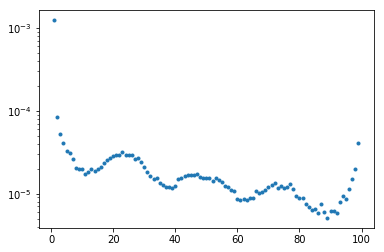

In [471]:
plt.semilogy(np.arange(n-1)+1, mu*sfs_avg, '.')

In [480]:
d_cutoff = locus_length//10
f_cutoff = 1
lhc = 0
for sfs in sfs_all:
    hi = np.sum(sfs[:, f_cutoff:-f_cutoff], axis=1)
    lo = np.sum(sfs, axis=1) - hi
    lhc += np.correlate(hi, lo[:-d_cutoff], 'valid') / (len(lo) - d_cutoff)
lhc /= num_reps

In [481]:
hi_tot = np.sum(sfs_avg[f_cutoff:-f_cutoff])
lo_tot = np.sum(sfs_avg[:f_cutoff]+sfs_avg[-f_cutoff:])

In [482]:
print(lo_tot*mu)

0.001283996424633413


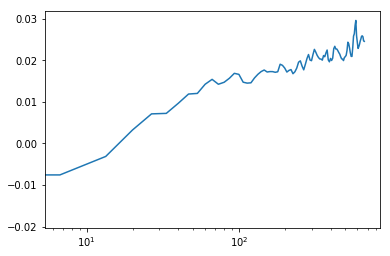

In [483]:
plt.semilogx(np.arange(d_cutoff+1)*r*T_2, np.log2(lhc / (hi_tot*lo_tot)))
#plt.hlines(0,1,100)
#plt.ylim([-0.11,0.11])